In [8]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter, NullFormatter
import matplotlib.pyplot as plt

fn_sample_alpha = "../Datas/Pgen/sample_alpha_output/Pgen_counts.csv"
fn_alpha_mc = "../Datas/Pgen/alpha_multiple_cells_output/Pgen_counts.csv"
fn_sample_beta = "../Datas/Pgen/sample_beta_output/Pgen_counts.csv"
fn_beta_mc = "../Datas/Pgen/beta_multiple_cells_output/Pgen_counts.csv"
fn_alpha_pairs = "../Datas/Pgen/alpha_pairs_output/Pgen_counts.csv"
fn_beta_pairs = "../Datas/Pgen/beta_pairs_output/Pgen_counts.csv"

In [9]:
df_sample_alpha = pd.read_csv(fn_sample_alpha, sep=";")
df_mc_alpha = pd.read_csv(fn_alpha_mc, sep=";")
df_pairs_alpha = pd.read_csv(fn_alpha_pairs, sep=";")

df_sample_beta = pd.read_csv(fn_sample_beta, sep=";")
df_mc_beta = pd.read_csv(fn_beta_mc, sep=";")
df_pairs_beta = pd.read_csv(fn_beta_pairs, sep=";")


In [10]:
print("mean of generic alpha sequences: ", np.mean(df_sample_alpha.Pgen_estimate))
print("mean of multiple-cells alpha sequences: ", np.mean(df_mc_alpha.Pgen_estimate))
print("mean of paired alpha sequences: ", np.mean(df_pairs_alpha.Pgen_estimate))

print("mean of generic beta sequences: ", np.mean(df_sample_beta.Pgen_estimate))
print("mean of multiple-cells beta sequences: ", np.mean(df_mc_beta.Pgen_estimate))
print("mean of paired beta sequences: ", np.mean(df_pairs_beta.Pgen_estimate))

mean of generic alpha sequences:  5.8808080796076006e-08
mean of multiple-cells alpha sequences:  5.513085928899452e-09
mean of paired alpha sequences:  1.5136040131815115e-08
mean of generic beta sequences:  6.930864846942774e-10
mean of multiple-cells beta sequences:  9.967153024486937e-11
mean of paired beta sequences:  1.5373710500207535e-10


<IPython.core.display.Javascript object>


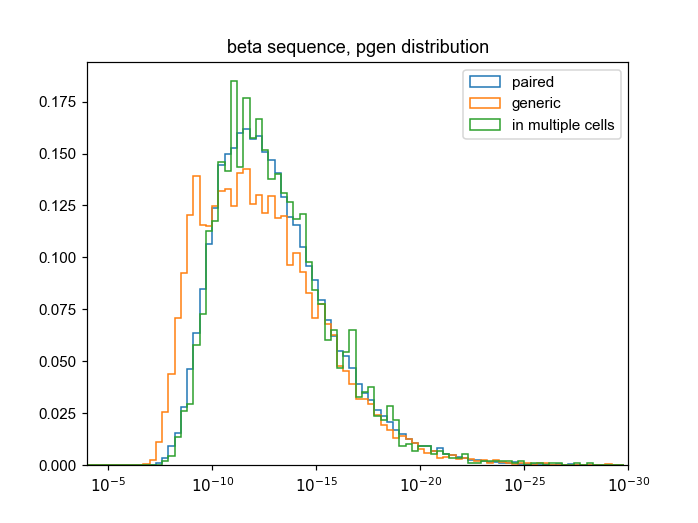

In [11]:
f, ax = plt.subplots()

bins = np.arange(4, 30,0.3)
plt.hist(-np.log10(df_pairs_beta.Pgen_estimate.dropna()),  bins=bins, histtype='step', density=True, label="paired")
plt.hist(-np.log10(df_sample_beta.Pgen_estimate.dropna()),  bins=bins, histtype='step', density=True, label="generic")
plt.hist(-np.log10(df_mc_beta.Pgen_estimate.dropna()), bins=bins, histtype='step', density=True, label="in multiple cells")

ax.set_xticks(range(5,40,5))
ax.set_xticklabels(["$10^{-%s}$" % i for i in range(5,40,5)])
ax.set_xlim(4,30)


ax.set_title("beta sequence, pgen distribution")
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


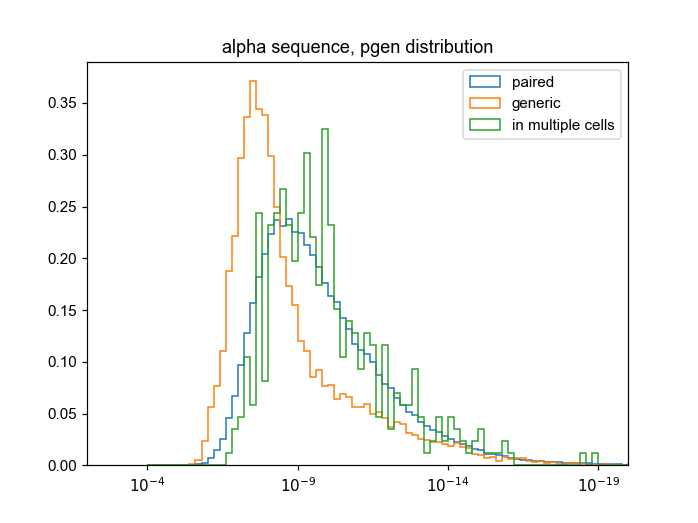

In [12]:
f, ax = plt.subplots()

bins = np.arange(4, 30,0.2)
plt.hist(-np.log10(df_pairs_alpha.Pgen_estimate.dropna()),  bins=bins, histtype='step', density=True, label="paired")
plt.hist(-np.log10(df_sample_alpha.Pgen_estimate.dropna()),  bins=bins, histtype='step', density=True, label="generic")
plt.hist(-np.log10(df_mc_alpha.Pgen_estimate.dropna()), bins=bins, histtype='step', density=True, label="in multiple cells")


ax.set_xticks(range(4,40,5))
ax.set_xticklabels(["$10^{-%s}$" % i for i in range(4,40,5)])
ax.set_xlim(2,20)

ax.set_title("alpha sequence, pgen distribution")
ax.legend()
plt.show()

In [13]:
dfab = pd.merge(df_pairs_alpha, df_pairs_beta, on='seq_index', suffixes=["_alpha", "_beta"])
dfab["proba_totale"] = dfab.apply(lambda s: s.Pgen_estimate_alpha * s.Pgen_estimate_beta, axis=1)

In [14]:
dfab_random = pd.concat([dfab]*200)
dfab_random = dfab_random.apply(lambda x: x.sample(frac=1).values)
dfab_random["proba_totale"] = dfab_random.apply(lambda s: s.Pgen_estimate_alpha * s.Pgen_estimate_beta, axis=1)


<IPython.core.display.Javascript object>


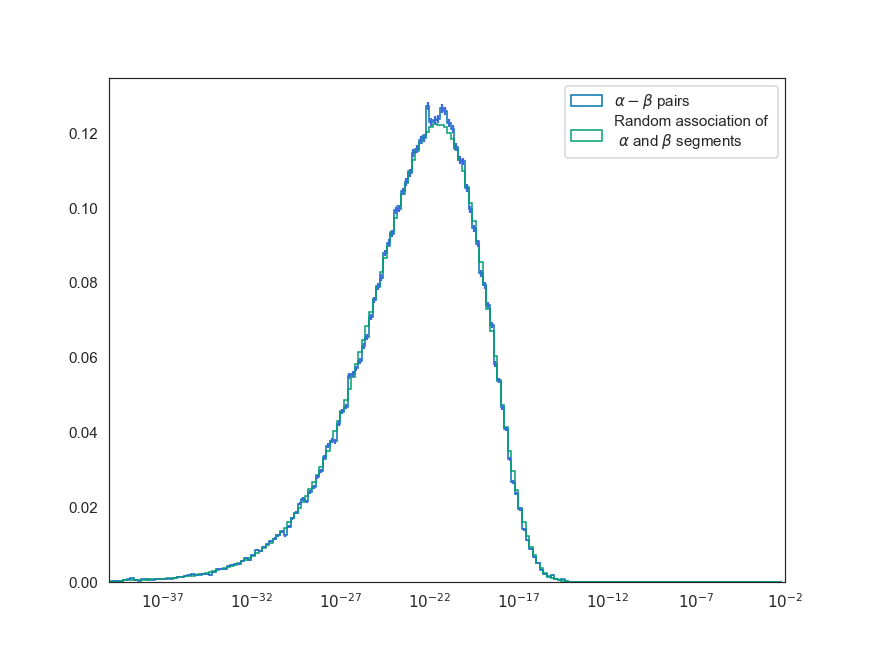

In [19]:
plt.style.use('seaborn-colorblind')
sns.set_style(style='white')

f, ax = plt.subplots(figsize=(8,6))
bins = np.arange(-40, -2,0.2)

entries, edges, _ = plt.hist(np.log10(dfab.proba_totale.dropna()),  
                             bins=bins, histtype='step', label="$\\alpha-\\beta$ pairs", density=True)

plt.hist(np.log10(dfab_random.proba_totale.dropna()),  
         bins=bins, histtype='step', label="Random association of \n $\\alpha$ and $\\beta$ segments", density=True)

bin_centers = 0.5*(edges[:-1] + edges[1:])

# Poissonian error bar
plt.errorbar(bin_centers, entries, yerr=np.sqrt(entries/len(dfab.proba_totale.dropna())), fmt='none', ecolor='royalblue', elinewidth=1.5)

ax.set_xticks(range(-2,-40,-5))
ax.set_xticklabels(["$10^{-%s}$" % i for i in range(2,40,5)])
ax.set_xlim(-40,-2)




ax.legend()
plt.savefig("histogram_proba_pairs.pdf")
plt.show()

<IPython.core.display.Javascript object>


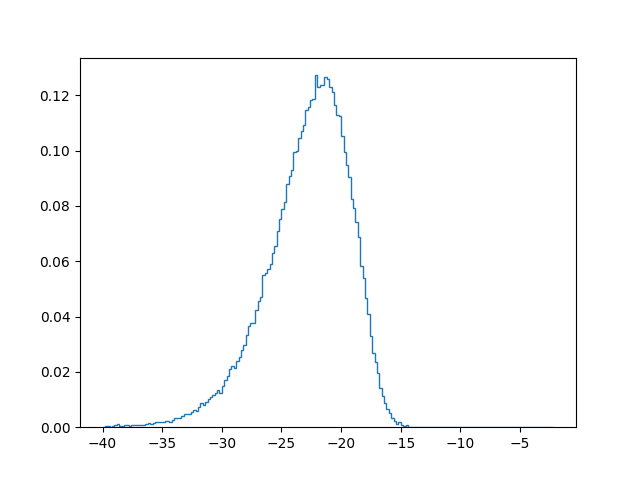

In [7]:
bins = np.arange(-40, -2,0.2)
plt.hist(np.log10(dfab.proba_totale.dropna()),  
                             bins=bins, histtype='step', label="$\\alpha-\\beta$ pairs", density=True)
plt.show()

In [29]:
df_pairs_alpha.sort_values("Pgen_estimate", ascending=False)

,seq_index,Pgen_estimate
9007,97919,0.000005
5485,101440,0.000004
46813,60111,0.000003
14500,92423,0.000003
29288,77635,0.000003
37101,69824,0.000003
8107,98817,0.000002
21266,85661,0.000002
11385,95544,0.000002
25302,81624,0.000002


In [26]:
dfab[np.log10(dfab.proba_totale).between(-22.22, -21.9)]

,seq_index,Pgen_estimate_alpha,Pgen_estimate_beta,proba_totale
45,106881,8.253710e-11,1.048510e-12,8.654097e-23
62,106861,2.893680e-08,3.749340e-15,1.084939e-22
63,106860,1.024070e-09,6.959990e-14,7.127517e-23
78,106847,3.313600e-08,2.004950e-15,6.643602e-23
98,106827,5.955880e-10,1.903850e-13,1.133910e-22
136,106788,5.910740e-12,1.125160e-11,6.650528e-23
145,106779,1.240440e-12,8.567970e-11,1.062805e-22
193,106733,4.391850e-12,1.715390e-11,7.533736e-23
264,106661,2.193350e-12,3.625040e-11,7.950981e-23
271,106653,4.299730e-09,2.909030e-14,1.250804e-22


In [17]:
dfab_full = pd.read_csv("../Datas/exp3/pairs_ab.tsv.gz", sep="\t")

In [24]:
dfab_full.iloc[indexes]

,Unnamed: 0,index_1,sequence_1,amino_1,copy_1,cdr3Length_1,vname_1,dname_1,jname_1,vdel_1,...,n1ins_2,status_2,wells_2,copies_2,nb_wells_2,short_wells_2,idx_2,distance,nb_wells_shared,log10_p_value
106881,106881,1275854,TCTCTGCAAATTGCAGCTACTCAACCTGGAGACTCAGCTGTCTACT...,CAENYYNTDKLIF,288,39,TCRAV13-02,NaN,TCRAJ34-01,1,...,1,In,"[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...","[0, 31, 0, 0, 10, 20, 11, 0, 0, 9, 0, 0, 15, 2...",47,0100111001001111110001000000010011111100101010...,136180,39,26,-0.885883
106861,106861,693822,CTCTCTCTGCACATTGTGCCCTCCCAGCCTGGAGACTCTGCAGTGT...,CAASVGGFKTIF,660,36,TCRAV29-01,NaN,TCRAJ09-01,0,...,3,In,"[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, ...","[0, 2, 0, 0, 0, 11, 8, 0, 0, 0, 0, 0, 1, 4, 0,...",47,0100011000001101101101100011010101011111101100...,256357,36,21,-0.084587
106860,106860,658760,CTCCACATCACAGCTGCCGTGCATGACCTCTCTGCCACCTACTTCT...,CAGMRRDTGNQFYF,370,42,TCRAV39-01,NaN,TCRAJ49-01,6,...,6,In,"[0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, ...","[0, 0, 11, 0, 0, 4, 8, 13, 0, 0, 15, 12, 16, 8...",47,0010011100111101010001110010000101010001111100...,145337,38,23,-0.265905
106847,106847,407538,ATTGAACAAGACAGCCAAACATTTCTCCCTGCACATCACAGAGACC...,NaN,1132,14,TCRAV13-01,NaN,TCRAJ57-01,19,...,4,In,"[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 2, 0, 6, 0, 3, 2, 0, 0, 7, 0, 0, 0, 0, ...",47,0010101100100000011110101011100100110100110000...,202299,48,18,-0.006632
106827,106827,1561684,TTGTTTCATATCACAGCCTCCCAGCCTGCAGACTCAGCTACCTACC...,CALASDTGNQFYF,433,39,TCRAV06-01,NaN,TCRAJ49-01,3,...,5,In,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, ...","[0, 4, 0, 8, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 5, ...",46,0101000000101010101001001101000001111011010110...,223176,43,21,-0.115336
106788,106788,818836,CTGCACCGTGCTACCTTGAGAGATGCTGCTGTGTACTACTGCATCC...,CILRPSNSGGYQKVTF,388,48,TCRAV26-02,NaN,TCRAJ13-01,3,...,0,In,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, ...","[0, 4, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 3, 0, 9, ...",46,0100000001001010110111001100011011010011010101...,385252,42,19,-0.027016
106779,106779,713350,CTGAATATCTCAGCATCCATACCTAGTGATGTAGGCATCTACTTCT...,CAGSPRGGSEKLVF,495,42,TCRAV35-01,NaN,TCRAJ57-01,4,...,5,In,"[0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, ...","[0, 0, 0, 25, 0, 5, 0, 0, 16, 5, 8, 0, 0, 0, 2...",46,0001010011100011011111111100100011010010110110...,237129,39,23,-0.334446
106733,106733,1408765,TTCACCATCACAGCCTCACAAGTCGTGGACTCAGCAGTATACTTCT...,CALIPKGGADGLTF,1062,42,TCRAV19-01,NaN,TCRAJ45-01,7,...,1,In,"[0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, ...","[0, 0, 0, 5, 0, 0, 0, 12, 39, 0, 29, 15, 0, 0,...",45,0001000110110011000110001011101111010001100010...,24371,34,24,-0.617935
106661,106661,58276,AACTTCACCATCACAGCCTCACAAGTCGTGGACTCAGCAGTATACT...,CACLGGGSYIPTF,1320,39,TCRAV19-01,NaN,TCRAJ06-01,11,...,0,In,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 32, 0, 0, 7,...",45,0000000100010011101111001111101101100011011001...,453062,44,21,-0.153756
106653,106653,1370969,TTATACATTGCAGCTTCTCAGCCTGGTGACTCAGCCACCTACCTCT...,CAVRGVQGAQKLVF,492,42,TCRAV21-01,NaN,TCRAJ54-01,1,...,3,In,"[0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 4, 2, 0, 2, 2, 3, 0, 0, 39, 0, 0, 0, 0,...",44,0011011100100001101110001110011010010101101110...,448007,40,19,-0.057489


In [22]:
dfab

,seq_index,Pgen_estimate_alpha,Pgen_estimate_beta,proba_totale
0,106924,2.751580e-10,5.963020e-10,1.640773e-19
1,106923,1.205000e-08,1.815660e-17,2.187870e-25
2,106922,5.217110e-10,1.016730e-09,5.304392e-19
3,106921,5.890360e-09,2.460140e-12,1.449111e-20
4,106920,9.814990e-10,2.347730e-15,2.304295e-24
5,106919,7.291520e-11,NaN,NaN
6,106918,3.047250e-09,2.013960e-10,6.137040e-19
7,106917,8.601290e-12,1.940260e-17,1.668874e-28
8,106916,NaN,9.478360e-12,NaN
9,106915,NaN,7.303010e-14,NaN
